<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Sample 데이터를 만들어 Random Forest에 대해 이해합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

# 1.데이터 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [2]:
# 데이터 만들기
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=50000,
                           n_features=2, 
                           n_informative=2,
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           weights=[0.95],
                           random_state=3)

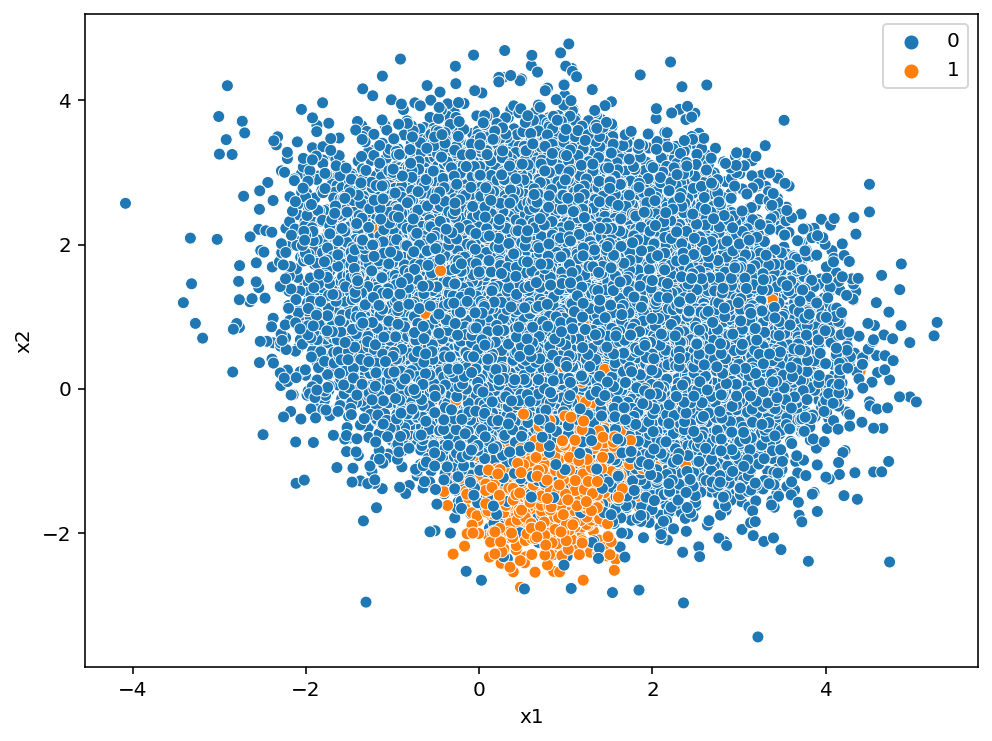

In [3]:
# 데이터 분포 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
# y 값 확인
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 47278, 1: 2722}


In [5]:
# 데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 2.모델링

In [6]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [7]:
# 2단계: 선언하기
model = RandomForestClassifier(random_state=2022)

In [8]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(random_state=2022)

In [9]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [10]:
# 5단계: 평가하기
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98     14177
           1       0.67      0.55      0.61       823

    accuracy                           0.96     15000
   macro avg       0.82      0.77      0.79     15000
weighted avg       0.96      0.96      0.96     15000



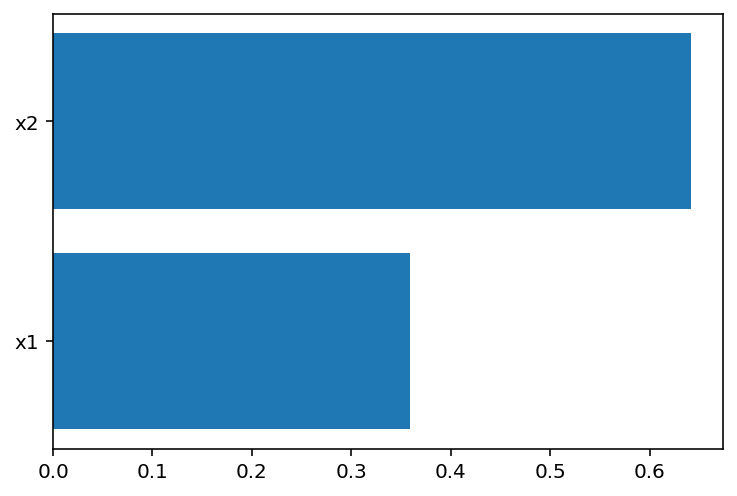

In [16]:
# 변수 중요도 확인
plt.barh(y=['x1','x2'], width=model.feature_importances_)
plt.show()

# 3.다양한 옵션들

- 설정 가능한 하이퍼파라미터가 정말 많습니다.

In [17]:
# 다양한 옵션 확인
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2022,
 'verbose': 0,
 'warm_start': False}

## 3.1.class_weight

- 불균형 데이터를 처리하는 것이 class_weight이다.
- class_weight={0:, 1:}의 형태로 가중치를 hardcoding이 가능하다.

In [18]:
# 2단계: 선언하기
model = RandomForestClassifier(max_depth=5, random_state=2022, class_weight='balanced')

In [19]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=2022)

In [20]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [22]:
# 5단계: 평가하기
# print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     14177
           1       0.40      0.88      0.55       823

    accuracy                           0.92     15000
   macro avg       0.70      0.90      0.75     15000
weighted avg       0.96      0.92      0.93     15000



## 3.2.oob_score

- oob(out of bag)
- 랜덤한 샘플 데이터로 트리를 만드는데 샘플로 사용되지 않은 데이터로 모델을 평가하는 것이다.

In [23]:
# oob_score 옵션(기본값=False)
model.set_params(oob_score=False)

# 3단계: 학습하기
model.fit(x_train, y_train)

# oob_score_ 확인
model.oob_score_ # AttrivuteError : 'RandomFroestClassifier' object has no attribute 'oob_score_'

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [24]:
# oob_score 옵션
model.set_params(oob_score=True)

# 3단계: 학습하기
model.fit(x_train, y_train)

# oob_score_ 확인
model.oob_score_

0.9151714285714285

##  3.3.warm_start

- 추가된 tree만 학습시키는 방법이다.

In [25]:
# warm_start 옵션(기본값=False)
model.set_params(warm_start=False, verbose=True)

RandomForestClassifier(class_weight='balanced', max_depth=5, oob_score=True,
                       random_state=2022, verbose=True)

In [26]:
# n_estimators 추가
model.n_estimators += 10

# 학습하기
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    2.9s finished


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=110,
                       oob_score=True, random_state=2022, verbose=True)

In [27]:
# warm_start 옵션 변경
model.set_params(warm_start=True)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=110,
                       oob_score=True, random_state=2022, verbose=True,
                       warm_start=True)

In [28]:
# n_estimators 추가
model.n_estimators += 10

# 학습하기
model.fit(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:765: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=120,
                       oob_score=True, random_state=2022, verbose=True,
                       warm_start=True)